# Find Teleconnections (precursor regions) via correlation maps 

In [1]:
import os, inspect
main_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) # script directory
print(main_dir)
%load_ext autoreload
%autoreload 2
from RGCPD import RGCPD
from RGCPD import BivariateMI
import class_BivariateMI, functions_pp
from IPython.display import Image
import numpy as np
import pandas as pd

/Users/semvijverberg/surfdrive/Scripts/RGCPD


In [2]:
# define input: 
path_test = os.path.join(main_dir, 'data') # path of test data
# format list_of_name_path = [('TVname', 'TVpath'), ('prec_name', 'prec_path')]
list_of_name_path = [(3, os.path.join(path_test, 'tf5_nc5_dendo_80d77.nc')),
                    ('sst', os.path.join(path_test,'sst_daily_1979-2018_5deg_Pacific_175_240E_25_50N.nc'))]

# Time-handling seasonal mode (DJF)

In [3]:
# define analysis:
list_for_MI = [BivariateMI(name='sst', func=class_BivariateMI.corr_map, 
                           alpha=.01, FDR_control=True, 
                           lags=np.array([['09-01', '11-30']]), # <- selecting time periods to aggregate
                           distance_eps=700, min_area_in_degrees2=5)]

rg = RGCPD(list_of_name_path=list_of_name_path,
           list_for_MI=list_for_MI,
           tfreq=None, # <- seasonal forecasting mode, set tfreq to None! 
           start_end_TVdate=('02-28', '12-01'), # <- defining DJF target period 
           path_outmain=os.path.join(main_dir,'data'))

rg.pp_TV(TVdates_aggr=True) # <- start_end_TVdate defineds aggregated over period

sorting latitude


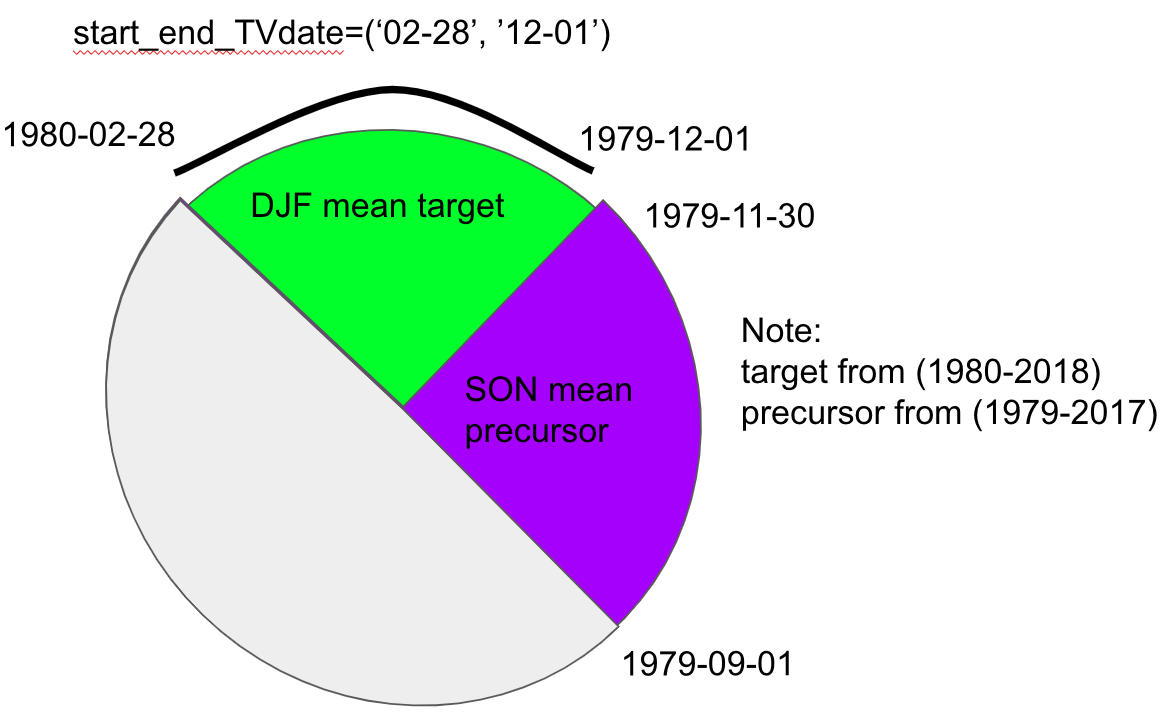

In [4]:
Image(filename = "./data/seasonal_mode_DJF.png", width = 600, height = 300)

In [5]:
# define analysis:
list_for_MI = [BivariateMI(name='sst', func=class_BivariateMI.corr_map, 
                           alpha=.05, FDR_control=True, 
                           lags=np.array([['06-01', '06-30'], ['05-01', '05-31'], ['04-01', '04-30']]), # <- selecting time-mean-periods
                           distance_eps=700, min_area_in_degrees2=4)]

rg = RGCPD(list_of_name_path=list_of_name_path,
           list_for_MI=list_for_MI,
           tfreq=None, # <- seasonal forecasting mode, set tfreq to None! 
           start_end_TVdate=('07-01', '08-31'), # <- defining JJA target period 
           path_outmain=os.path.join(main_dir,'data'))

rg.pp_TV(TVdates_aggr=True) # <- start_end_TVdate defineds aggregated over period

sorting latitude


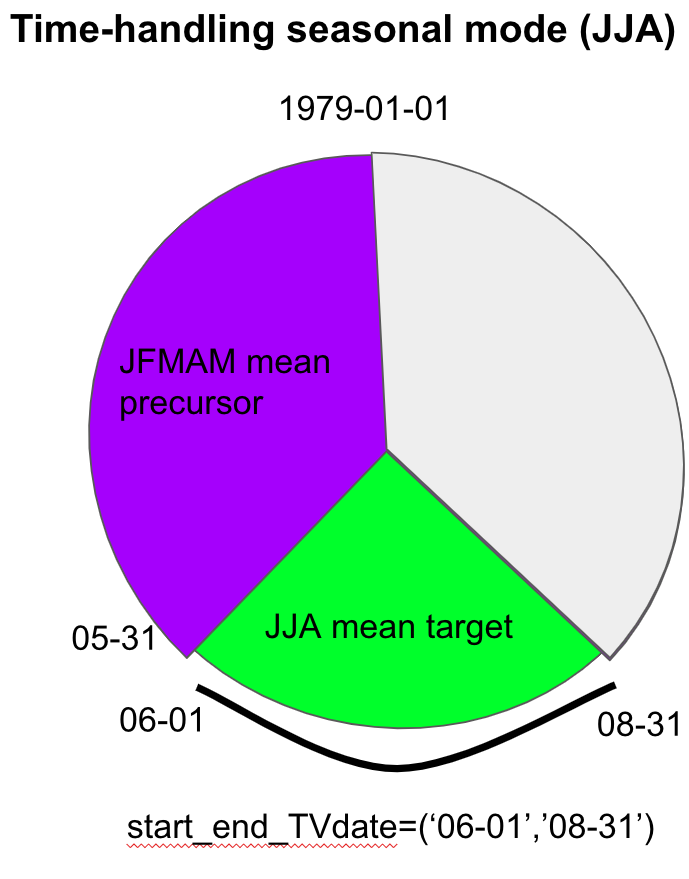

In [6]:
# for lag period ['01-01', '05-31']
Image(filename = "./data/seasonal_mode_JJA.png", width = 400, height = 200)

Some notes on data input:
- Works for both monthly and daily data. If loading in monthly data, the exact same reasoning is followed.
- If loading one-value-per-year target (such as annual crop yield), one can choose to go into 'subseasonal mode' by selecting ext_annual_to_mon=True in RGCPD.pp_TV(). See subseasonal_mode.ipynb. Default is to stay in seasonal mode. 

sorting latitude
Plotting Corr maps xrclustered, split 0, lag 0


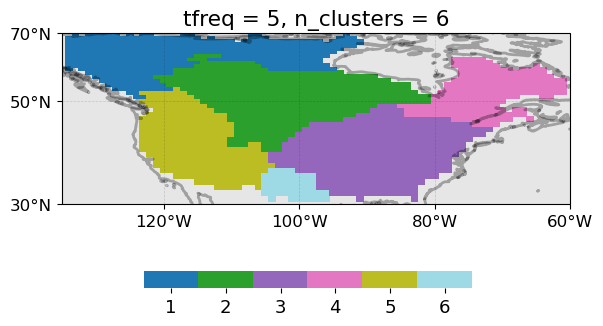

In [7]:
# if TVpath contains the xr.DataArray that is clustering beforehand, we can have a look at the spatial regions.
rg.plot_df_clust()

In [8]:
rg.pp_precursors(detrend=True, anomaly=True, selbox=None)

Loaded pre-processed data of sst



<AxesSubplot:>

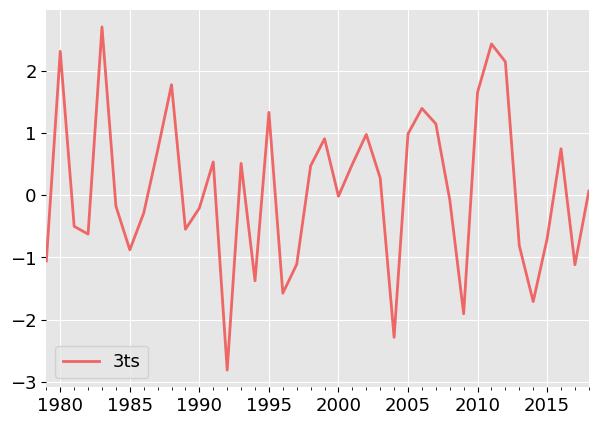

In [9]:
rg.df_fullts.plot()

After pre-processing both the target and the precursor dataset(s), we have to choose a type of cross-validation procedure. See rg.traintest? for options. 

Below we choose a leave-5-years-out CV with excluding a single training year prior and after the test sets to avoid the possible influences of adjacent years in the temporarily correlated time series.

In [10]:
rg.traintest(method='leave_5', gap_prior=1, gap_after=1, seed=1)
rg._get_testyrs()

array([[1979, 1980, 1981, 1982, 1983],
       [1984, 1985, 1986, 1987, 1988],
       [1989, 1990, 1991, 1992, 1993],
       [1994, 1995, 1996, 1997, 1998],
       [1999, 2000, 2001, 2002, 2003],
       [2004, 2005, 2006, 2007, 2008],
       [2009, 2010, 2011, 2012, 2013],
       [2014, 2015, 2016, 2017, 2018]], dtype=object)

In [11]:
rg.calc_corr_maps() 

[1979 2018] ('06-01', '06-30')
[1979 2018] ('05-01', '05-31')
[1979 2018] ('04-01', '04-30')

sst - calculating correlation maps
Progress traintest set 100%, trainsize=(34dp, 85%)



Plotting Corr maps sst, split 0, lag 0
Plotting Corr maps sst, split 0, lag 1
Plotting Corr maps sst, split 0, lag 2


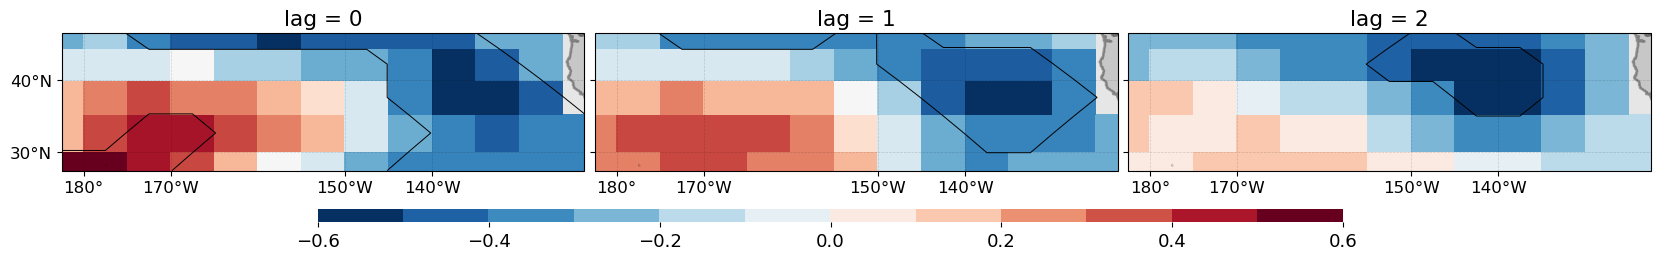

In [12]:
rg.plot_maps_corr(kwrgs_plot={'clevels':np.arange(-.6,.61, 0.1)}, min_detect_gc=0.5)

In [13]:
rg.cluster_list_MI()

In [14]:
sst = rg.list_for_MI[0] # extract BivariateMI instance linked to the sst dataset

Initially, the period-mean lags are are labelled with the corresponding index. It is recommended to explicitly name the period-means to something you understand.

In [15]:
periodnames = ['June', 'May', 'April']
sst.prec_labels['lag'] = ('lag', periodnames)
sst.corr_xr['lag'] = ('lag', periodnames)

Plotting Corr maps sst_labels_init, split 0, lag June
Plotting Corr maps sst_labels_init, split 1, lag June
Plotting Corr maps sst_labels_init, split 2, lag June
Plotting Corr maps sst_labels_init, split 3, lag June
Plotting Corr maps sst_labels_init, split 4, lag June
Plotting Corr maps sst_labels_init, split 5, lag June
Plotting Corr maps sst_labels_init, split 6, lag June
Plotting Corr maps sst_labels_init, split 7, lag June
Plotting Corr maps sst_labels_init, split 0, lag May
Plotting Corr maps sst_labels_init, split 1, lag May
Plotting Corr maps sst_labels_init, split 2, lag May
Plotting Corr maps sst_labels_init, split 3, lag May
Plotting Corr maps sst_labels_init, split 4, lag May
Plotting Corr maps sst_labels_init, split 5, lag May
Plotting Corr maps sst_labels_init, split 6, lag May
Plotting Corr maps sst_labels_init, split 7, lag May
Plotting Corr maps sst_labels_init, split 0, lag April
Plotting Corr maps sst_labels_init, split 1, lag April
Plotting Corr maps sst_labels_init

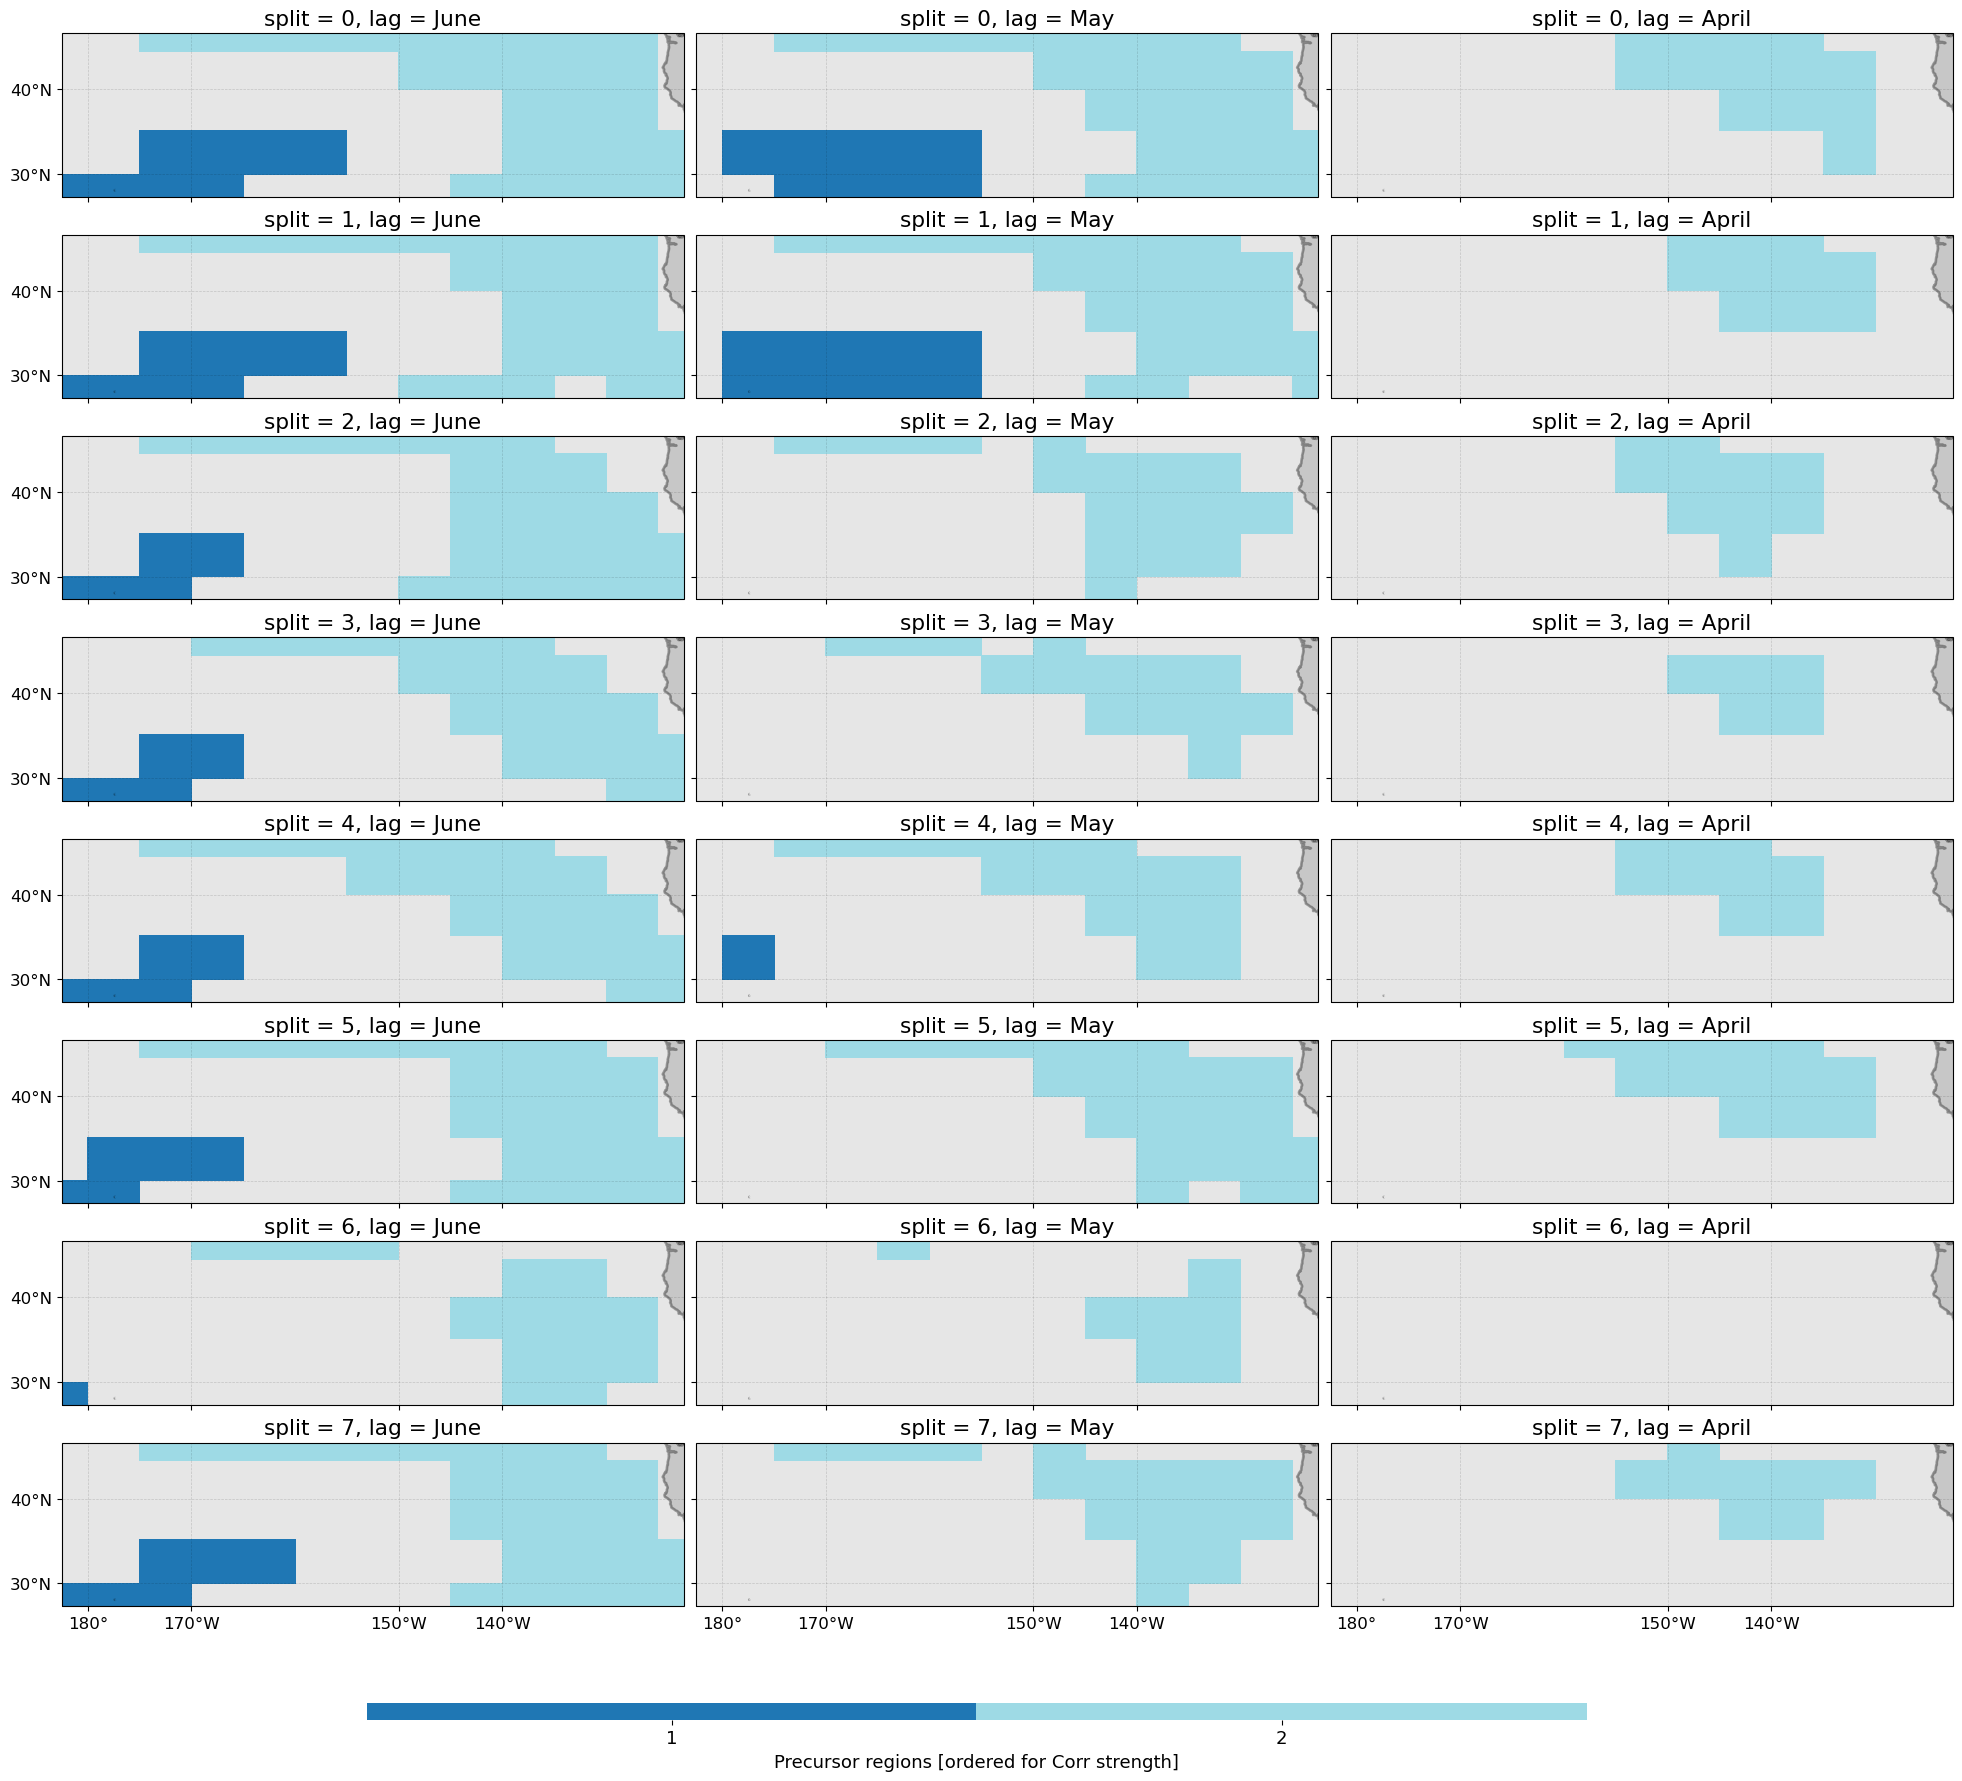

In [16]:
rg.quick_view_labels(mean=False, kwrgs_plot={'cbar_vert':0.09, 'hspace':-.5}) 

## Handling precursor regions

In [17]:
rg.get_ts_prec()
rg._df_count # how many times is each precursor regions found in the different training sets


Getting MI timeseries
There are [5, 5, 4, 4, 5, 4, 3, 4] regions in total (list of different splits)


June..1..sst     8
June..2..sst     8
May..1..sst      3
May..2..sst      8
April..2..sst    7
dtype: object

In [18]:
import find_precursors, plot_maps
df_prec_regions = find_precursors.labels_to_df(rg.list_for_MI[0].prec_labels)
df_prec_regions # center lat,lon coordinates and size (in number of gridcells)

,latitude,longitude,n_gridcells
1.0,29.772727,191.136364,11.0
2.0,38.906250,219.375000,32.0


## Splitting precursor regions
Below we will get a plot with the old (upper plot) and new clusters after splitting (bottom plot)

Plotting Corr maps sst_labels_init, split 0, lag June

New label will become 3.0
Plotting Corr maps sst_labels_init, split 0, lag June


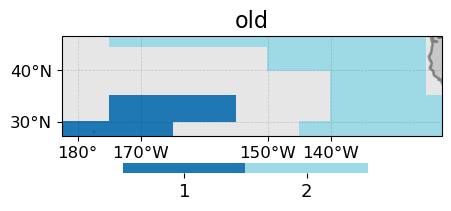

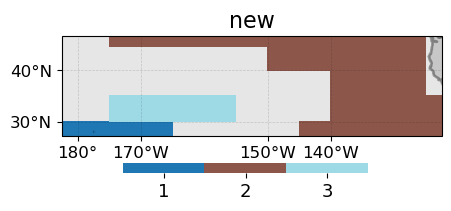

In [19]:
split = find_precursors.split_region_by_lonlat
new_labels, label = split(rg.list_for_MI[0].prec_labels, label=1,
                          kwrgs_mask_latlon={'latmax':30}) # <- split region 1 by 30 degree latitude
rg.list_for_MI[0].prec_labels = new_labels

## Merging precursor regions
Merging what we just splitted.

Plotting Corr maps sst_labels_init, split 0, lag June
Plotting Corr maps sst_labels_init, split 0, lag May
Plotting Corr maps sst_labels_init, split 0, lag April


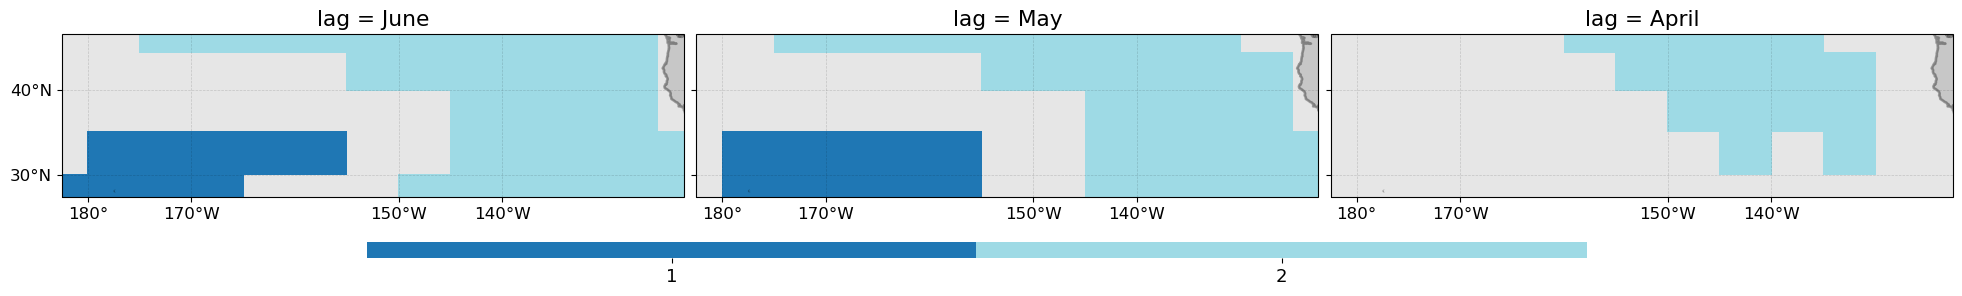

In [20]:
merge = find_precursors.merge_labels_within_lonlatbox
updated_labels = merge(rg.list_for_MI[0], lonlatbox=[170,200,25,40])
plot_maps.plot_labels(updated_labels.mean(dim='split'))  
rg.list_for_MI[0].prec_labels = updated_labels # overwrite prec_labels in precur class

In [21]:
rg.get_ts_prec()


Getting MI timeseries
There are [5, 5, 4, 4, 5, 4, 3, 4] regions in total (list of different splits)


In [22]:
rg.df_data

3ts  June..1..sst  June..2..sst  May..1..sst  May..2..sst  \
0 1979-01-01 -1.056345     -0.426006      0.143812    -0.063357     0.121136   
  1980-01-01  2.315733      0.469406     -0.332271     0.001002    -0.238715   
  1981-01-01 -0.499555      0.492238      0.172718     0.206454     0.080387   
  1982-01-01 -0.625263     -1.164239     -0.468055     0.172523    -0.472368   
  1983-01-01  2.708213      0.059288     -0.298711    -0.650015    -0.254859   
...                ...           ...           ...          ...          ...   
7 2014-01-01 -1.710712     -0.534878      0.524877          NaN     0.625708   
  2015-01-01 -0.699032     -0.538407      0.876686          NaN     0.529281   
  2016-01-01  0.748446     -0.232535      0.493787          NaN     0.215412   
  2017-01-01 -1.117912     -0.135204     -0.021317          NaN    -0.244842   
  2018-01-01  0.068023     -0.443215     -0.080283          NaN    -0.062274   

              April..2..sst  TrainIsTrue  RV_mask  
0 1979-01-01       0.481535            0     True  
  1980-01-01       0.010753            0     True  
  1981-01-01       0.262420            0     True  
  1982-01-01      -0.260861            0     True  
  1983-01-01      -0.504303            0     True  
...                     ...          ...      ...  
7 2014-01-01       0.775029            0     True  
  2015-01-01       0.682828            0     True  
  2016-01-01      -0.298478            0     True  
  2017-01-01      -0.707882            0     True  
  2018-01-01      -0.387420            0     True  

[320 rows x 8 columns]

## Train-test cross-validation and Response Variable mask handling

- The different train-test folds are organized in the first level index.
- Each fold contains precursor timeseries that were extracted from only training data.
- The Training data is specified by the TrainIsTrue mask.
- In seasonal mode the Target Variable mask is always True.
- No lag shifting of precursors, user needs to select timeseries with the desired lag (period mean) to feed into their analysis/forecast model.

## Functionality for Causal Inference
(Define your own Conditional Independence tests)

In [23]:
import wrapper_PCMCI
corr, pvals = wrapper_PCMCI.df_data_Parcorr(rg.df_data, 
                                            target='3ts',
                                            keys=['June..2..sst'],
                                            z_keys=['June..1..sst'])
pvals

,,0,1,2,3,4,5,6,7
x,z,,,,,,,,
June..2..sst,June..1..sst,0.000393,0.002952,0.000057,0.000059,0.000048,0.000472,0.000081,0.000015


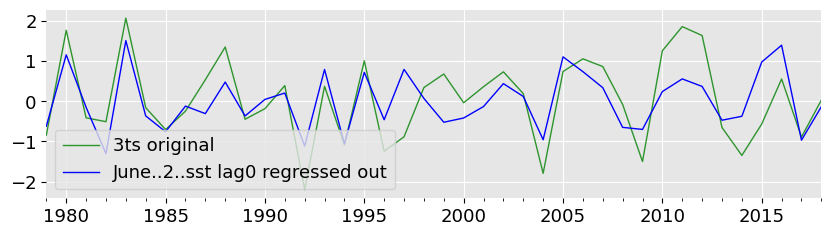

In [24]:
df_trans = rg.transform_df_data()

df_z_removed = wrapper_PCMCI.df_data_remove_z(df_trans,
                                              keys=['3ts'],
                                              z_keys=['June..2..sst'])

## Causal Discovery using Tigramite not possible in seasonal mode
This is because there is no 'shared time-axis', hence, lags cannot be automatically handled. 
Lags should be dealt with mannually by selecting the timeseries you want to use/analyse.

# Forecasting pipeline 1

In [25]:
import func_models as fc_utils
from stat_models_cont import ScikitModel
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegressionCV


# choose type prediciton (continuous or probabilistic) by making comment #
prediction = 'continuous'   
# prediction = 'events' ; q = .66 # quantile threshold for event definition

if prediction == 'continuous':
    model = ScikitModel(Ridge, verbosity=0)
    # You can also tune parameters by passing a list of values. Then GridSearchCV from sklearn will 
    # find the set of parameters that give the best mean score on all kfold test sets. 
    # below we pass a list of alpha's to tune the regularization.
    alphas = list(np.concatenate([[1E-20],np.logspace(-5,0, 6), np.logspace(.01, 2.5, num=25)]))                       
    kwrgs_model = {'scoringCV':'neg_mean_absolute_error',
                   'kfold':5,
                   'alpha':alphas} # large a, strong regul.
elif prediction == 'events':
    model = ScikitModel(LogisticRegressionCV, verbosity=0)
    kwrgs_model = {'kfold':5,
                   'scoring':'neg_brier_score'}

target_ts = rg.TV.RV_ts ; 
target_ts = (target_ts - target_ts.mean()) / target_ts.std()
if prediction == 'events':
    if q >= 0.5:
        target_ts = (target_ts > target_ts.quantile(q)).astype(int)
    elif q < .5:
        target_ts = (target_ts < target_ts.quantile(q)).astype(int)
    BSS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).BSS
    score_func_list = [BSS, fc_utils.metrics.roc_auc_score]
    
elif prediction == 'continuous':
    RMSE_SS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).RMSE
    MAE_SS = fc_utils.ErrorSkillScore(constant_bench=float(target_ts.mean())).MAE
    score_func_list = [RMSE_SS, fc_utils.corrcoef, MAE_SS]
        

keys = [k for k in rg.df_data.columns[1:-2]]
out = rg.fit_df_data_ridge(target=target_ts,
                            keys=keys, 
                            fcmodel=model,
                            kwrgs_model=kwrgs_model,
                            transformer=None,
                            tau_min=0, tau_max=0) # <- lag should be zero
predict, weights, model_lags = out

df_train_m, df_test_s_m, df_test_m, df_boot = fc_utils.get_scores(predict,
                                                                 rg.df_data.iloc[:,-2:],
                                                                 score_func_list,
                                                                 n_boot = 100, # bootstrapping for Conf. Intervals
                                                                 score_per_test=False,
                                                                 blocksize=1,
                                                                 rng_seed=1)

if prediction == 'events':
    print(model.scikitmodel.__name__, '\n', f'Test score at lag {lag}\n',
          'BSS {:.2f}\n'.format(df_test_m.loc[0].loc[0].loc['BSS']),
          'AUC {:.2f}'.format(df_test_m.loc[0].loc[0].loc['roc_auc_score']),
          '\nTrain score\n',
          'BSS {:.2f}\n'.format(df_train_m.mean(0).loc[0]['BSS']),
          'AUC {:.2f}'.format(df_train_m.mean(0).loc[0]['roc_auc_score']))
elif prediction == 'continuous':
    print(model.scikitmodel.__name__, '\n', 'Test score\n',
          'RMSE {:.2f}\n'.format(df_test_m.loc[0][0]['RMSE']),
          'MAE {:.2f}\n'.format(df_test_m.loc[0][0]['MAE']),
          'corrcoef {:.2f}'.format(df_test_m.loc[0][0]['corrcoef']),
          '\nTrain score\n',
          'RMSE {:.2f}\n'.format(df_train_m.mean(0).loc[0]['RMSE']),
          'MAE {:.2f}\n'.format(df_train_m.mean(0).loc[0]['MAE']),
          'corrcoef {:.2f}'.format(df_train_m.mean(0).loc[0]['corrcoef']))

Ridge 
 Test score
 RMSE 0.21
 MAE 0.16
 corrcoef 0.62 
Train score
 RMSE 0.36
 MAE 0.34
 corrcoef 0.77


## Forecasting pipeline - using combined lead-time models

Refers to making seperate models for each precursor region using multiple lags. These models are then used as input for the final forecasting model. This reduces the amount of precursors that are feed into the model at the same time and thereby reduces overfitting. Also, using multiple lags for each precursor seperately may result in a small set of models which are better at describing the low-frequency variability of the precursor timeseries. 

Step 1: Make multiple Combined-Lead time models, these predict the target using only a single precursor region with multiple lags.

Step 2: Merge the Combined-Lead time model predictions and use them as input to construct a final model to (again) forecast the target. 

In [26]:
collect_CL_models = [] # collect Combined-Lead time models
precursor_regions = np.unique(['..'.join(k.split('..')[1:]) for k in rg.df_data.columns[1:-2]]) # unique precursor regions 
sel_months = periodnames[:]
for region in precursor_regions:
    # only use keys prior to target dates (July-August)
    keys_of_months = [k+'..'+region for k in sel_months]
    keys = [k for k in keys_of_months if region in k] # select all precursor timeseries of one particular region
    single_region_model = rg.fit_df_data_ridge(target=target_ts,
                                               keys=keys,
                                               fcmodel=model,
                                               kwrgs_model=kwrgs_model,
                                               transformer=None,
                                               tau_min=0, tau_max=0)[0] # <- lag should be zero, already defined by periodmeans
    single_region_model = single_region_model.rename({0:region + '_comblead'}, axis=1)
    collect_CL_models.append(single_region_model.iloc[:,[1]])
df_CL_models = pd.concat(collect_CL_models, axis=1)

Now use the Combined-Lead time model to predict the target. 

In [27]:
# first re-store information of traintest splits 
df_input = df_CL_models.merge(rg.df_data.iloc[:,-2:], 
                              left_index=True, right_index=True)
out = rg.fit_df_data_ridge(target=target_ts,
                           df_data=df_input,
                           fcmodel=model,
                           kwrgs_model=kwrgs_model,
                           transformer=None,
                           tau_min=0, tau_max=0) # <- lag should be zero
predict, weights, model_lags = out

df_train_m, df_test_s_m, df_test_m, df_boot = fc_utils.get_scores(predict,
                                                                 rg.df_data.iloc[:,-2:],
                                                                 score_func_list,
                                                                 n_boot = 100,
                                                                 score_per_test=False,
                                                                 blocksize=1,
                                                                 rng_seed=1)
lag = 0
if prediction == 'events':
    print(model.scikitmodel.__name__, '\n', f'Test score at lag {lag}\n',
          'BSS {:.2f}\n'.format(df_test_m.loc[0].loc[0].loc['BSS']),
          'AUC {:.2f}'.format(df_test_m.loc[0].loc[0].loc['roc_auc_score']),
          '\nTrain score\n',
          'BSS {:.2f}\n'.format(df_train_m.mean(0).loc[0]['BSS']),
          'AUC {:.2f}'.format(df_train_m.mean(0).loc[0]['roc_auc_score']))
elif prediction == 'continuous':
    print(model.scikitmodel.__name__, '\n', 'Test score\n',
          'RMSE {:.2f}\n'.format(df_test_m.loc[0][0]['RMSE']),
          'MAE {:.2f}\n'.format(df_test_m.loc[0][0]['MAE']),
          'corrcoef {:.2f}'.format(df_test_m.loc[0][0]['corrcoef']),
          '\nTrain score\n',
          'RMSE {:.2f}\n'.format(df_train_m.mean(0).loc[0]['RMSE']),
          'MAE {:.2f}\n'.format(df_train_m.mean(0).loc[0]['MAE']),
          'corrcoef {:.2f}'.format(df_train_m.mean(0).loc[0]['corrcoef']))

Ridge 
 Test score
 RMSE 0.21
 MAE 0.16
 corrcoef 0.62 
Train score
 RMSE 0.35
 MAE 0.33
 corrcoef 0.76


Especially with a large number of different precursor regions acting on different timescales, this can be used to improve skill and reduce the amount of overfitting (train_score/test_score), thereby also increasing the stability of the model.

In [28]:
predict

RV3ts         0
0 1979-01-01 -0.864195 -0.343197
  1980-01-01  1.662334  0.331949
  1981-01-01 -0.447020 -0.097033
  1982-01-01 -0.541207  0.247242
  1983-01-01  1.956399  0.256715
...                ...       ...
7 2014-01-01 -1.354479 -1.256897
  2015-01-01 -0.596478 -1.604093
  2016-01-01  0.488044 -0.675245
  2017-01-01 -0.910324  0.216101
  2018-01-01 -0.021762  0.020745

[320 rows x 2 columns]

In [29]:
m = model_lags['lag_0']['split_0']
m # if prediction == 'continuous', this show the GridSearchCV output, else it shows the fitted logistic model.

GridSearchCV(cv=PredefinedSplit(test_fold=array([0, 0, 4, 2, 3, 1, 0, 1, 3, 1, 1, 4, 0, 2, 4, 4, 1, 2, 1, 2, 0, 3,
       0, 4, 0, 3, 3, 2, 3, 4, 3, 1, 2, 2])),
             estimator=Ridge(), n_jobs=3,
             param_grid={'alpha': [1e-20, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0,
                                   1.023292992280754, 1.2994213556374827,
                                   1.6500610013202277, 2.0953182709100417,
                                   2.6607250597988097, 3.378702864441983,
                                   4.290421892388855, 5.448161839981667,
                                   6.918309709189366, 8.78516656407272,
                                   11.155781513508526, 14.166090109900438,
                                   17.988709151287882, 22.84283485557348,
                                   29.006811986931545, 36.834094671918606,
                                   46.77351412871984, 59.39501549952438,
                                   75.42233958475711

In [30]:
if prediction == 'continuous':
    print(m.cv_results_['mean_test_score'])

[-0.63792648 -0.63792645 -0.63792625 -0.6379242  -0.63790375 -0.63770098
 -0.63583231 -0.63578754 -0.6352695  -0.63464389 -0.6338975  -0.63305458
 -0.63233045 -0.63154225 -0.63075611 -0.631044   -0.63133081 -0.63239479
 -0.63367273 -0.63500699 -0.63638325 -0.63778301 -0.63980446 -0.64631911
 -0.66151206 -0.6778579  -0.69381924 -0.71021413 -0.7248531  -0.737661
 -0.74866731 -0.75797944]


<AxesSubplot:>

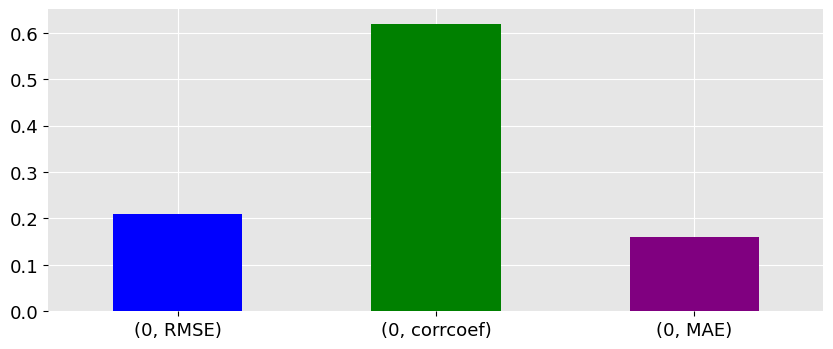

In [31]:
df_test_m.loc[0].plot.bar(rot=0, color=['blue', 'green', 'purple'], figsize=(10,4))

/Users/semvijverberg/miniconda3/envs/RGCPD/lib/python3.7/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


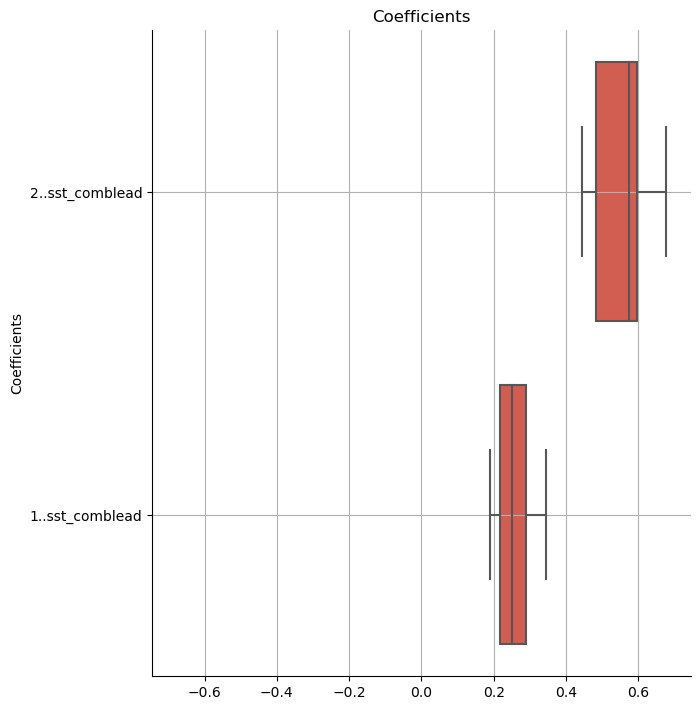

In [32]:
from stat_models import plot_importances
df_weights, fig = plot_importances(models_splits_lags=model_lags, lag=0)